In [7]:
import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import os
plt.ion()

In [2]:
from shapely.geometry import Polygon, mapping
from rasterio.mask import mask
# A package created for this class that will be discussed later in this lesson
import earthpy as et

# Set standard plot parameters for uniform plotting
plt.rcParams['figure.figsize'] = (8, 8)

# Prettier plotting with seaborn
import seaborn as sns; 
sns.set(font_scale=1.5)
sns.set_style("white")


In [8]:
with rio.open('./spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as lidar_dem:
    lidar_dem_im = lidar_dem.read(1, masked=True)
    # get bounds for plotting
    bounds = plotting_extent(lidar_dem)

In [19]:
with rio.open('./spatial/boulder-leehill-rd/pre-flood/lidar/pre_DSM.tif') as lidar_dsm:
    lidar_dsm_im = lidar_dsm.read(1, masked=True)

In [21]:
# are the bounds the same?
print("Is the spatial extent the same?", lidar_dem.bounds == lidar_dsm.bounds), 

## is the resolution the same ??
print("Is the resolution the same?", lidar_dem.res == lidar_dsm.res)




Is the spatial extent the same? True
Is the resolution the same? True


In [22]:
lidar_chm_im = lidar_dsm_im - lidar_dem_im

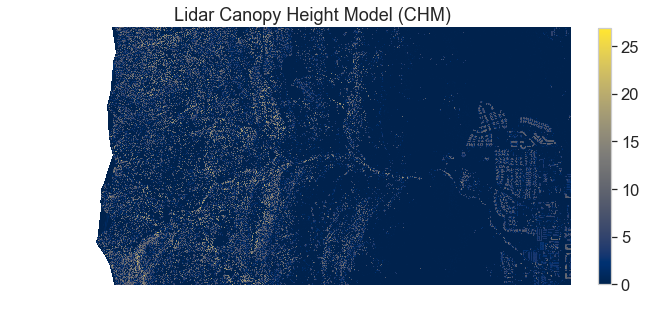

In [28]:
fig, ax = plt.subplots(figsize = (10,6))
chm_plot = ax.imshow(lidar_chm_im, 
                     cmap='cividis')
fig.colorbar(chm_plot, fraction=.023, ax=ax)
ax.set_title("Lidar Canopy Height Model (CHM)")
ax.set_axis_off();

Text(0.5, 0, 'Elevation in [M]')

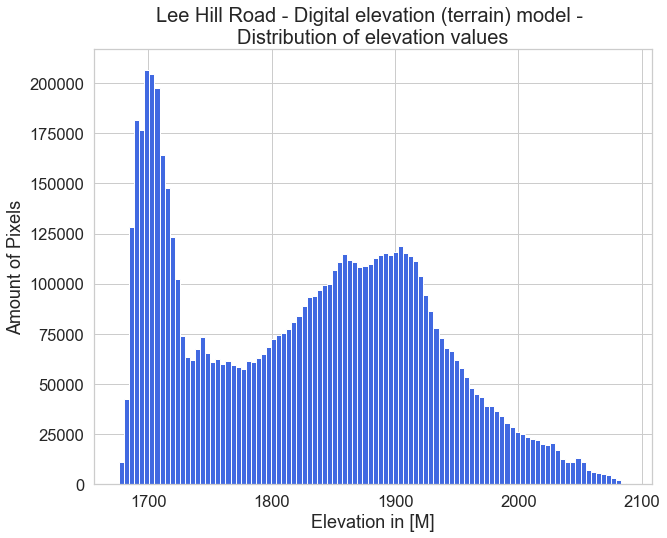

In [30]:
sns.set_style("whitegrid")
# Plot histogram
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(lidar_dem_im.ravel(),
        bins=100, 
        color='royalblue')
ax.set_title("Lee Hill Road - Digital elevation (terrain) model - \nDistribution of elevation values", 
             fontsize=20);
plt.ylabel("Amount of Pixels")
plt.xlabel("Elevation in [M]")

In [ ]:
with rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    print(src.bounds)


Text(0, 0.5, 'Amount')

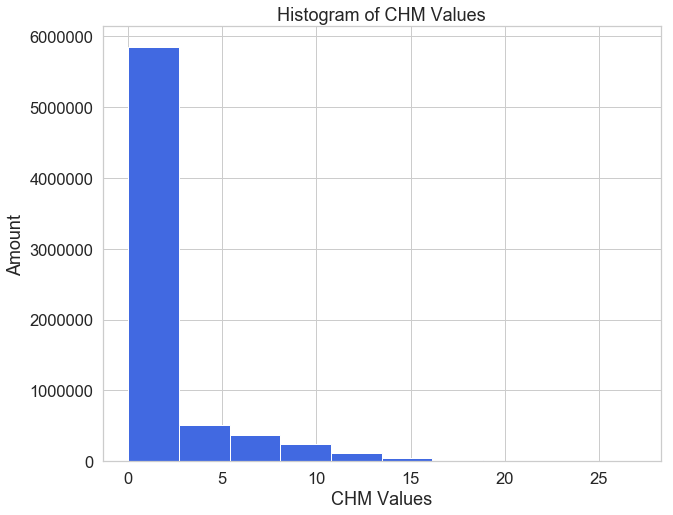

In [33]:
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(lidar_chm_im.ravel(), 
        color = 'royalblue')
ax.set_title("Histogram of CHM Values");
plt.xlabel("CHM Values")
plt.ylabel("Amount")

In [34]:
print('CHM minimum value: ', lidar_chm_im.min())
print('CHM max value: ', lidar_chm_im.max())


CHM minimum value:  0.0
CHM max value:  26.930054


In [35]:
nodatavalue = -999.0
lidar_chm_im_fi = np.ma.filled(lidar_chm_im, fill_value=nodatavalue)
lidar_chm_im_fi.min(), nodatavalue

(-999.0, -999.0)

In [36]:
# update the metadata to ensure the nodata value is properly documented 

# create dictionary copy
chm_meta = lidar_dem.meta.copy()
# update the nodata value to be an easier to use number
chm_meta.update({'nodata': nodatavalue})
chm_meta


{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -999.0,
 'width': 4000,
 'height': 2000,
 'count': 1,
 'crs': CRS.from_dict(init='epsg:32613'),
 'transform': Affine(1.0, 0.0, 472000.0,
        0.0, -1.0, 4436000.0)}

In [37]:
lidar_chm_im_fi.shape

(2000, 4000)